In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers
from keras.layers.recurrent import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("../xlsx/combine_vector.csv", names=[\
                                                                  'P0','P1','P2','P3','P4','P5','P6','P7','P8',
                                                                  'P9','P10','P11','P12','P13','P14','P15','P16',
                                                                  'P17','P18','P19','P20','P21','P22','P23','P24',
                                                                  'P25','P26','P27','P28','P29'], header=None)

df_train = pd.get_dummies(df_train)
#filling NA's with the mean of the column:
df_train = df_train.fillna(df_train.mean())

X_train = df_train[['P0','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13',\
                    'P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26',
                    'P27','P28']]

X_train = MaxAbsScaler().fit_transform(X_train)

y = df_train['P29'].values

def create_model():
    # create model 
    
    model = Sequential()
    model.add(Dense(12, input_dim=29, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='tanh'))
    model.add(Dropout(0.8))
    model.add(Dense(1,activation='tanh'))
    # Compile model
    
    model.compile( 
        loss = 'binary_crossentropy', 
        metrics =['acc'],
    optimizer='rmsprop', 
    )
    return model

833
0.064
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                360       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)      

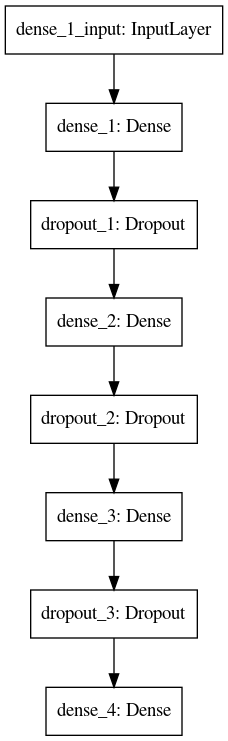

In [3]:
seed = 30
np.random.seed(seed)


w = [12,8,2,1]
# w = [12,8,1]
suma = 0
for i in range(len(w)):
    if i == 0:
        suma += w[0]*59
    elif i != len(w)-1:
        suma += w[i]*(w[i-1]+1)
    else:
        suma += w[i-1]+w[i]
#     print(suma)
        
srednia = suma/1228
wycznacz_podzial =  round(1-srednia,2)*0.2


print(suma)
print(wycznacz_podzial)

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=wycznacz_podzial, random_state=seed)

model = create_model()
model.summary()


from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=1)]
#     ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True)]

from keras.utils import plot_model
plot_model(model, to_file='model.png')

# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

# from pprint import pprint
# pprint(class_weights)

In [4]:

history = model.fit(
    X_train, y_train, 
    validation_data=(X_test,y_test), 
    epochs=15, 
    batch_size=50,
)

Train on 1140 samples, validate on 78 samples
Epoch 1/15
1140/1140 [==============================] - 0s 395us/step - loss: 146.0068 - acc: 0.0114 - val_loss: 23.0634 - val_acc: 0.0128
Epoch 2/15
1140/1140 [==============================] - 0s 39us/step - loss: 137.3612 - acc: 0.0105 - val_loss: 22.3782 - val_acc: 0.0128
Epoch 3/15
1140/1140 [==============================] - 0s 45us/step - loss: 119.7708 - acc: 0.0114 - val_loss: -15.0892 - val_acc: 0.0128
Epoch 4/15
1140/1140 [==============================] - 0s 49us/step - loss: 54.8201 - acc: 0.0114 - val_loss: 6.2334 - val_acc: 0.0128
Epoch 5/15
1140/1140 [==============================] - 0s 44us/step - loss: 119.8706 - acc: 0.0096 - val_loss: 34.7766 - val_acc: 0.0128
Epoch 6/15
1140/1140 [==============================] - 0s 38us/step - loss: 47.9419 - acc: 0.0114 - val_loss: 35.5352 - val_acc: 0.0128
Epoch 7/15
1140/1140 [==============================] - 0s 37us/step - loss: 35.7417 - acc: 0.0105 - val_loss: 34.7433 - val_ac

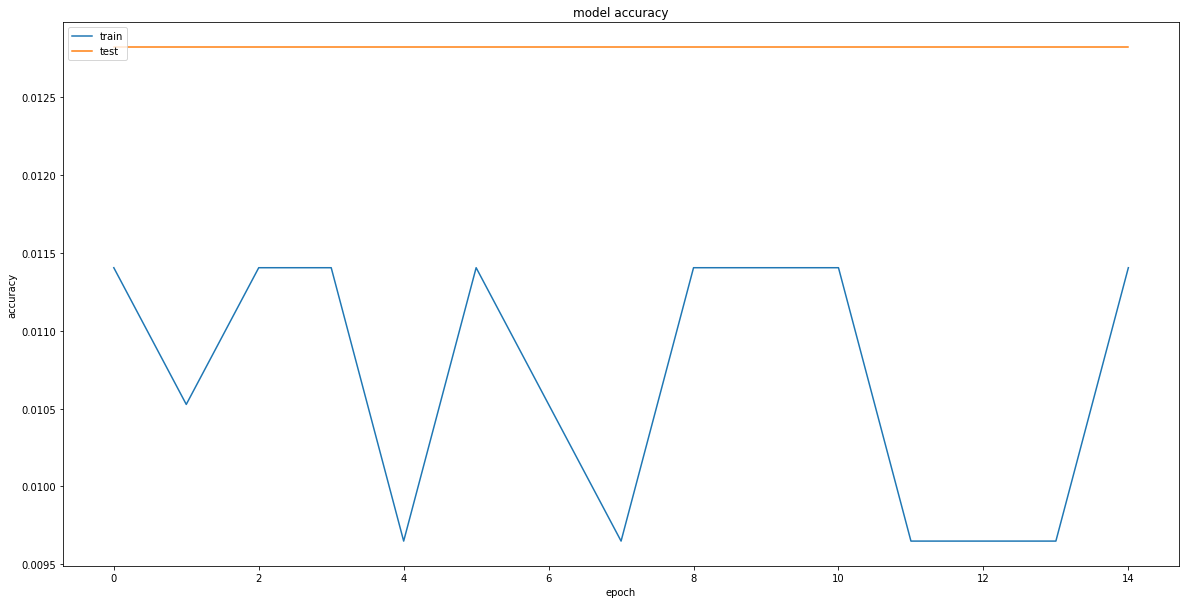

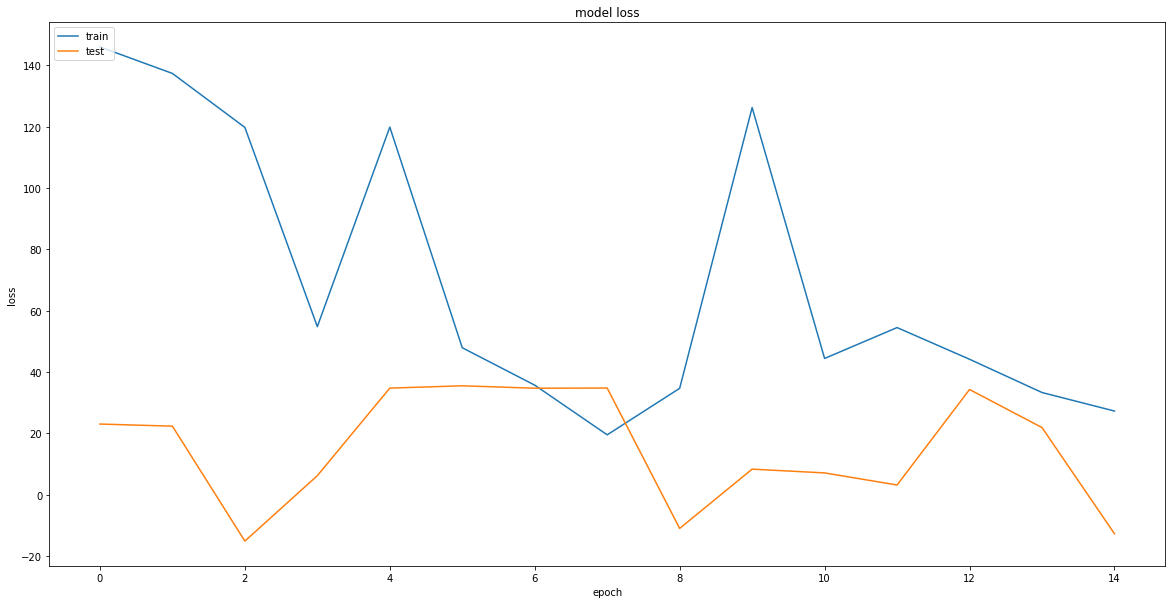

[143.365226397598, 0.009649123065173626]
acc: 0.96%
[-12.696631798377403, 0.012820512987673283]
acc: 1.28%
EXPECTED	RECEIVED	x100
  -30.0038	   -0.3568	  -35.6809
  +80.5970	   +0.7129	  +71.2885
  -64.9701	   +0.5987	  +59.8668
  -27.5413	   -0.1449	  -14.4866
   -2.1186	   -0.5363	  -53.6323
  -36.5514	   -0.6059	  -60.5894
  -14.4238	   -0.7351	  -73.5060
  -25.2019	   -0.1598	  -15.9810
  -64.3715	   +0.2854	  +28.5416
  -60.2934	   -0.7055	  -70.5456
   +2.1956	   +0.6093	  +60.9273
   -4.1880	   -0.7376	  -73.7601


In [5]:
plt.rcParams["figure.figsize"] = (20,10)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


scores = model.evaluate(X_train, y_train, verbose=0) 
print(scores)
print("acc: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=0) 
print(scores)
print("acc: %.2f%%" % (scores[1]*100))



d1 = np.array([48.4131,0.0000,0.0000,48.4134,-1035.3488,48.4097,-40.4730,0.0000,0.0000,-48.2638,0.0000,0.0000,0.0000,55.2165,42.0915,33.6905,0.0000,0.0000,0.0000,-62.8770,0.0000,-34.9827,-44.3053,38.8720,-50.0160,-51.5453,-94.2426,0.0000,0.0000])
d2 = np.array([-37.0052,0.0000,0.0000,-37.0050,0.0000,0.0000,65.2752,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-94.1176,1488.1931,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,878.0369,-69.0890,0.0000,0.0000,-57.9931,-60.4913,0.0000])
d3 = np.array([-11.4117,0.0000,11.5566,-2.1732,-11.9212,0.0000,-172.8720,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-31.3004,0.0000,0.0000,9.6880,0.0000,0.0000,36.8956,-1.8579,38.5352,-16.2803,1.2568,-9.3780,0.0000])
d4 = np.array([-27.5505,0.0000,27.5474,-27.5522,0.0000,0.0000,-27.0744,0.0000,0.0000,-5.6760,0.0000,0.0000,0.0000,-16.1936,0.0000,-45.6252,-43.2488,0.0000,0.0000,9.9941,0.0000,0.0000,99.6342,-29.2064,0.0000,-45.2905,-47.0522,0.0000,0.0000])
d5 = np.array([1.1984,0.0000,0.0000,1.1970,0.0000,-0.1155,-12.6190,0.0000,0.0000,-8.0022,0.0000,0.0000,0.0000,7.0157,0.0000,0.0000,0.0000,0.0000,0.0000,18.4047,0.0000,0.0000,1.4375,25.2092,0.0000,135.7621,0.0000,0.0000,0.0000])
d6 = np.array([44.1597,0.0000,0.0000,44.1595,44.1756,0.0000,-49.9617,0.0000,0.0000,-70.8841,0.0000,0.0000,0.0000,0.0000,0.0000,45.0450,43.4849,0.0000,0.0000,181.2090,0.0000,0.0000,26.5169,0.0000,0.0000,269.1953,0.0000,0.0000,0.0000])
d7 = np.array([3.9709,0.0000,0.0000,-41.2864,0.0000,0.0000,8.4048,0.0000,0.0000,-67.8837,0.0000,0.0000,0.0000,0.0000,7.4190,383.3333,0.0000,-0.2236,0.0000,357.2392,0.0000,0.0000,60.4982,0.0000,272.3150,424.0172,0.0000,-4.3828,0.0000])
d8 = np.array([0.2133,0.0000,0.0000,7.1604,-0.0446,0.0000,176.2257,0.0000,0.0000,-37.6446,0.0000,0.0000,0.0000,-27.9808,-27.5544,0.0000,-13.6310,-9.9795,0.0000,-26.0907,0.0000,0.0000,-21.9263,19.4134,0.0000,-15.4321,21.1427,0.0509,0.0000])
d9 = np.array([-0.5255,0.0000,0.0000,-2.0148,0.0000,0.0000,-2372.0864,0.0000,0.0000,-98.1872,0.0000,0.0000,0.0000,2.1720,-37.4547,0.0000,0.0000,0.0000,0.0000,395.2508,0.0000,0.0000,-8.8732,3.7282,11.9422,36.5752,1118.8649,187.5000,0.0000])
d10 = np.array([114.3991,0.0000,0.0000,0.0000,0.0000,168.4171,-114.7866,0.0000,0.0000,253.6101,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,216.5577,0.0000,0.0000,99.0300,0.0000,0.0000,232.8381,0.0000,0.0000,0.0000])
d11 = np.array([-13.0559,0.0000,0.0000,320.2904,0.0000,0.0000,-49.8086,0.0000,0.0000,-48.2662,0.0000,0.0000,0.0000,10.8582,-62.1501,0.0000,0.0000,0.0000,0.0000,201.1481,0.0000,0.0000,104.5713,0.0000,-50.2799,-41.9420,81.6304,-26.9126,0.0000])
ztreningu = np.array([-16.5188,0.0000,0.0000,-14.0580,0.0000,-14.1809,0.1889,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-48.2489,0.0000,0.0000,0.0000,0.0000,-50.1146,0.0000,0.0000,12.9624,32.4263,-15.1324,0.0000,0.0000,0.0000,0.0000])


expected = [-30.0038,80.5970,-64.9701,-27.5413,-2.1186,-36.5514,-14.4238,-25.2019,-64.3715,-60.2934,2.1956,-4.1880]
i=0

print('EXPECTED\tRECEIVED\tx100')
for data in [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,ztreningu]:
    znak = 1
    received=model.predict(data.reshape(1,29),batch_size =1)[0][0]
    print('%+10.4f\t%+10.4f\t%+10.4f'%(expected[i],received,received*100))
    i+=1

# col_width = 10  # padding
# for row in data:
#     print (row.rjust(50, '0'))

In [6]:
from datetime import datetime

outputfilename = 'vec29B_'+ str(datetime.now().strftime('%H:%M:%S'))
# serialize model to JSON
model_json = model.to_json()
with open(outputfilename+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(outputfilename+".h5")
print("Saved model to disk")

Saved model to disk


In [7]:
from sklearn.preprocessing import MaxAbsScaler
X = np.array([[ -0.5,1,1.2,-.6,1.1,1.6,1.,-6]])
print(X)
X = MaxAbsScaler().fit_transform(X)
print(X)

[[-0.5  1.   1.2 -0.6  1.1  1.6  1.  -6. ]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]


In [8]:
from sklearn.preprocessing import MaxAbsScaler
X = np.array([[1.1984,0.0000,0.0000,1.1970,0.0000,-0.1155,-12.6190,0.0000,0.0000,-8.0022,0.0000,0.0000,0.0000,7.0157,0.0000,0.0000,0.0000,0.0000,0.0000,18.4047,0.0000,0.0000,1.4375,25.2092,0.0000,135.7621,0.0000,0.0000,0.0000,-2.1186]])
from pprint import pprint
pprint(X)
X = MaxAbsScaler().fit_transform(X)
pprint(X)

array([[ 1.198400e+00,  0.000000e+00,  0.000000e+00,  1.197000e+00,
         0.000000e+00, -1.155000e-01, -1.261900e+01,  0.000000e+00,
         0.000000e+00, -8.002200e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  7.015700e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  1.840470e+01,
         0.000000e+00,  0.000000e+00,  1.437500e+00,  2.520920e+01,
         0.000000e+00,  1.357621e+02,  0.000000e+00,  0.000000e+00,
         0.000000e+00, -2.118600e+00]])
array([[ 1.,  0.,  0.,  1.,  0., -1., -1.,  0.,  0., -1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0., -1.]])
